# Metallurgy. Task 1. Металлургия. Задание 1.

An employee of the product quality assessment service noticed that the number of defective steel sheets in the batch for steel grade `A` is greater than for steel grade `B`. He also drew attention to the fact that with an average rolling speed of more than 4 m/s, the number of defective sheets is greater. In accordance with these observations, it is proposed to reduce the rolling speed and introduce additional quality control measures for `A` grade steel.,
    Check:

    1) More than 3 defective sheets per batch come out significantly more often for steel grade `A` than for steel grade `B`.
    2) At rolling speeds of more than 4 m/s, more than 3 defective steel sheets per batch come out significantly more often than at lower rolling speeds.

The data required for analysis is contained in the \"Statistics for 2018\" file. The number of steel sheets in each batch is assumed to be the same.

Сотрудник службы оценки качества продукции заметил, что число бракованных листов стали в партии для стали марки `A` больше, чем для стали марки `B`. Также он обратил внимание, что при средней скорости прокатки более 4 м/с число бракованных листов больше. В соответствии с этими наблюдениями, предлагается снизить скорость прокатки и ввести дополнительные меры контроля качества для стали марки `A`.
Обоснуйте, что:

    1)	Более 3 бракованных листов на партию выходит значимо чаще для стали марки `А`, чем для стали марки `B`.
    2)	При скоростях прокатки более 4 м/с свыше 3 бракованных листов стали на партию выходит значимо чаще, чем при меньших скоростях прокатки.

Данные, необходимые для анализа, содержатся в файле «Статистика за 2018 год». Количество листов стали в каждой партии предполагается одинаковым.

## Libs import. Импорт библиотек

In [1]:
import pandas as pd
from IPython.display import display
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from scipy import stats as st
from scipy.stats import kurtosis
from scipy.stats import skew

Cell scrolling is off. Вспомогательный модуль для устранения скроллинга ячеек

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Data loading. EDA. Загрузка и изучение файла

In [3]:
data = pd.read_csv('F:/Metallurgy/Task1/Статистика за 2018 год.csv', encoding='cp1251')
display(data.head())
data.info()
data.describe()

,Число бракованных листов,Скорость прокатки,Марка стали
0,3,3.8,A
1,3,3.8,B
2,3,4.8,B
3,4,4.4,B
4,6,5.0,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Число бракованных листов  237 non-null    int64  
 1   Скорость прокатки         237 non-null    float64
 2   Марка стали               237 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 5.7+ KB


,Число бракованных листов,Скорость прокатки
count,237.000000,237.000000
mean,3.257384,4.509705
std,1.807821,0.696260
min,0.000000,2.500000
25%,2.000000,4.100000
50%,3.000000,4.600000
75%,4.000000,5.000000
max,8.000000,6.500000


Data were loaded. There are no missing values found. Coalumns: `Num of defected sheets`, `Rolling speed`, `Steel grade`.

Выполнена загрузка данных. Пропусков не обнаружено.

## Hypothesis testing according to point 1. Проверка гипотезы по пункту 1.

In this task, it is necessary to check that more than 3 defective sheets per batch come out significantly more often for steel grade 'A' than for steel grade 'B'.

To test the null and alternative hypotheses $H_0: p_1 = p_2;H_1: p_1 <> p_2$, we use the test $\chi^2$-statistics.

В данном задании необходимо обосновать, что более 3 бракованных листов на партию выходит значимо чаще для стали марки `А`, чем для стали марки `B`.

Чтобы проверить нулевую и альтернативные гипотезы используем тестовую $\chi^2$-статистику.

### Adding a column with the check `more than 3 defective sheets per batch`. Добавление столбца с проверкой `больше 3-х листов брака на партию`.

In [4]:
data['Deffect Брак'] = data['Число бракованных листов'] > 3
display(data.head())

,Число бракованных листов,Скорость прокатки,Марка стали,Deffect Брак
0,3,3.8,A,False
1,3,3.8,B,False
2,3,4.8,B,False
3,4,4.4,B,True
4,6,5.0,B,True


### Cross tabulation. Таблица перекрестной классификации

Марка стали,A,B,Total
Deffect Брак,,,
False,86,54,140
True,53,44,97
Total,139,98,237


<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, False to Total
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       3 non-null      int64
 1   B       3 non-null      int64
 2   Total   3 non-null      int64
dtypes: int64(3)
memory usage: 96.0+ bytes


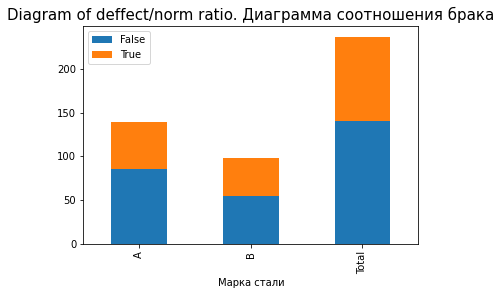

In [5]:
df_ct_1 = pd.crosstab(data['Deffect Брак'], data['Марка стали'], margins = True, margins_name = 'Total')
display(df_ct_1)
df_ct_1.info()
df_ct_1.drop('Total', axis = 0).T.plot(kind = 'bar', stacked = True)
plt.title('Diagram of deffect/norm ratio. Диаграмма соотношения брака', fontsize = 15)
plt.legend()
plt.show()

We calculated a cross tabulation with the distribution of normal (`False`) and defective (`True`) batches by steel grades. A graph is also plotted.

Вычислили таблицу перекрестной классификации с распределением нормальных (`False`) и бракованных (`True`) партий по маркам сталей. Так же построен график 

### Calculating $\chi^2$ and testing the hypothesis of equality of fractions. Вычисление $\chi^2$ и проверка гипотезы о равенстве долей

In [6]:
def hyp_testing(df_ct, alpha):
    value = np.array([df_ct.iloc[1][0:2].values,
                      df_ct.iloc[0][0:2].values])
    chi2, p_value, dof, _ = st.chi2_contingency(value, correction = False)
    chi2_critical = st.chi2.ppf(1-alpha, dof)
    print('chi2: ', chi2)
    print('p_value: ', p_value)
    print('dof: ', dof)
    print()
    print('alpha: ', alpha)
    print('chi2_critical: ', chi2_critical)
    print()
    if chi2_critical < chi2:
        print('The hypothesis H0 is rejected. Гипотеза Н0 отклоняется!')
    else:
        print('The hypothesis H0 is not rejected. Гипотеза Н0 не отклоняется!')

In [7]:
alpha_1 = 0.05
hyp_testing(df_ct_1, alpha_1)

chi2:  1.0891044742877811
p_value:  0.2966697135957961
dof:  1

alpha:  0.05
chi2_critical:  3.841458820694124

The hypothesis H0 is not rejected. Гипотеза Н0 не отклоняется!


Using a nonparametric $\chi^2$ test, it was found that more than 3 defective sheets per batch do NOT come out significantly more often for steel grade `A` than for steel grade `B` at a critical level of $\alpha$ = 5%. The value of $\chi^2$, which is obtained in this study, is close enough to zero, which indicates a small value of the squares of the difference between the observed and expected values. Therefore, there is no need to introduce additional quality control measures for `A` grade steel.

С помощъю непараметрического $\chi^2$-теста установлено, что более 3 бракованных листов на партию НЕ выходит значимо чаще для стали марки `A`, чем для стали марки `B` при критическом уровне $\alpha$ = 5%. Значение $\chi^2$, которое получено в данном исследовании достаточно близко к нулю, что говорит о небольшом значении квадратов разности между наблюдаемыми и ожидаемыми значениями. Поэтому, не нужно вводить дополнительные меры контроля качества для стали марки `A`.

## Hypothesis testing according to point 2. Проверка гипотезы по пункту 2.

In this task, it is necessary to check that at rolling speeds of more than 4 m/s, more than 3 defective steel sheets per batch come out significantly more often than at lower rolling speeds.

To test the null and alternative hypotheses $H_0: p_1 = p_2;H_1: p_1 <> p_2$ we also use the test $\chi^2$-statistics, BUT without dividing by steel grades.

В данном задании необходимо обосновать, что при скоростях прокатки более 4 м/с свыше 3 бракованных листов стали на партию выходит значимо чаще, чем при меньших скоростях прокатки.

Чтобы проверить нулевую и альтернативные гипотезы также используем тестовую $\chi^2$-статистику, НО без деления на марки стали.

### Adding a column with the check `more than 3 sheets of scrap per batch at a speed > 4 m/s`. Добавление столбца с проверкой `больше 3-х листов брака на партию при скорости > 4 м/с`.

In [8]:
data['High rolling speed Высокая скорость'] = data['Скорость прокатки'] > 4
display(data.head())

,Число бракованных листов,Скорость прокатки,Марка стали,Deffect Брак,High rolling speed Высокая скорость
0,3,3.8,A,False,False
1,3,3.8,B,False,False
2,3,4.8,B,False,True
3,4,4.4,B,True,True
4,6,5.0,B,True,True


### Cross tabulation. Таблица перекрестной классификации

High rolling speed Высокая скорость,False,True,Total
Deffect Брак,,,
False,35,105,140
True,23,74,97
Total,58,179,237


<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, False to Total
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   False   3 non-null      int64
 1   True    3 non-null      int64
 2   Total   3 non-null      int64
dtypes: int64(3)
memory usage: 96.0+ bytes


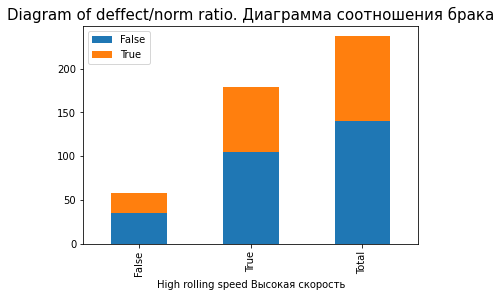

In [9]:
df_ct_2 = pd.crosstab(data['Deffect Брак'], data['High rolling speed Высокая скорость'], margins = True, margins_name = 'Total')
display(df_ct_2)
df_ct_2.info()
df_ct_2.drop('Total', axis = 0).T.plot(kind = 'bar', stacked = True)
plt.title('Diagram of deffect/norm ratio. Диаграмма соотношения брака', fontsize = 15)
plt.legend()
plt.show()

In [10]:
alpha_2 = 0.05
hyp_testing(df_ct_2, alpha_2)

chi2:  0.05148060580663982
p_value:  0.820506649959321
dof:  1

alpha:  0.05
chi2_critical:  3.841458820694124

The hypothesis H0 is not rejected. Гипотеза Н0 не отклоняется!


Using a nonparametric $\chi^2$ test, it was found that more than 3 defective sheets per batch do NOT come out significantly more often at a rolling speed above 4 m/s, at a critical level of $\alpha$ = 5%. The value of $\chi^2$, which is obtained in this study, is very close to zero, which indicates a small value of the squares of the difference between the observed and expected values. Therefore, there is no need to reduce the rolling speed.

С помощъю непараметрического $\chi^2$-теста установлено, что более 3 бракованных листов на партию НЕ выходит значимо чаще при скорости прокатки выше 4 м/с, при критическом уровне $\alpha$ = 5%. Значение $\chi^2$, которое получено в данном исследовании очень близко к нулю, что говорит о небольшом значении квадратов разности между наблюдаемыми и ожидаемыми значениями. Поэтому, не нужно снижать скорость прокатки.

## Main conclusion. Общий вывод

In this task, using a nonparametric $\chi^2$ test, it was found that in both cases hypotheses about a significant increase in the number of batches with scrap > 3 sheets are not confirmed. In this regard, there is no need to introduce additional quality control measures for `A` grade steel and there is no need to reduce the rolling speed.

В данном задании с помощъю непараметрического $\chi^2$-теста установлено, что в обоих случаях не подтверждаются гипотезы об значимом увеличении количества партий с браком > 3 листов. Всвязи с этим нет необходимости вводить дополнительные меры контроля качества для стали марки `A` и нет необходимости снижать скорость прокатки.